In [63]:
from pytens import *

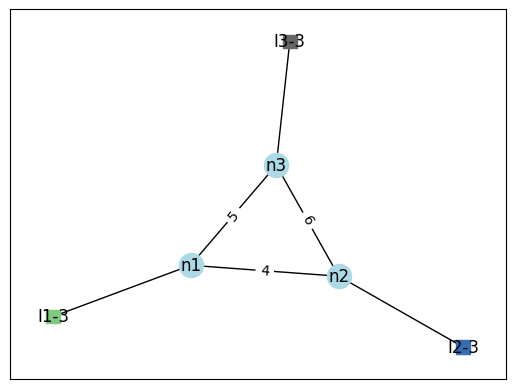

In [64]:
net = TensorNetwork()
n1 = np.random.randn(3,4,5)
n1_indices = [Index("I1", 3), Index("r12", 4), Index("r13", 5)]
n2 = np.random.randn(3,4,6)
n2_indices = [Index("I2", 3), Index("r12", 4), Index("r23", 6)]
n3 = np.random.randn(3,5,6)
n3_indices = [Index("I3", 3), Index("r13", 5), Index("r23", 6)]
net.add_node("n1", Tensor(n1, n1_indices))
net.add_node("n2", Tensor(n2, n2_indices))
net.add_node("n3", Tensor(n3, n3_indices))
net.add_edge("n1", "n2")
net.add_edge("n1", "n3")
net.add_edge("n2", "n3")
net.draw()
plt.show()


In [65]:
print(net.norm())
print(net.network.nodes["n1"]["tensor"].indices)

47.88587303213627
[Index(name='I1', size=3), Index(name='r12', size=4), Index(name='r13', size=5)]


In [66]:
net_val = net.contract().value
print(np.linalg.norm(net_val))

47.88587303213627


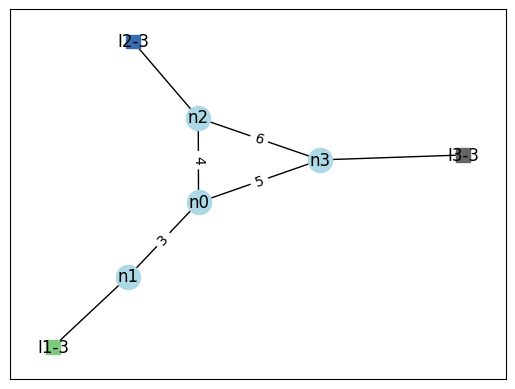

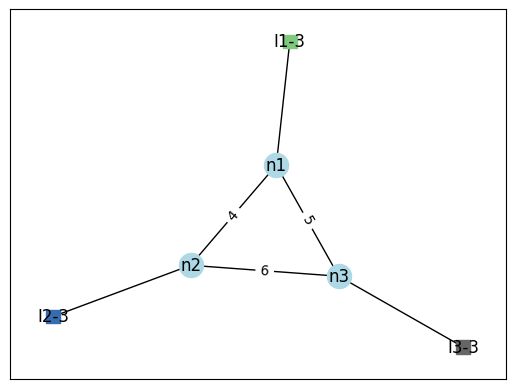

[Index(name='I2', size=3), Index(name='r12', size=4), Index(name='r23', size=6)]


In [6]:
net.merge("n3", "n0")
net.draw()
plt.show()
print(net.network.nodes["n2"]["tensor"].indices)

In [7]:
net.delta_split("n2", [0,1],[2],mode="qr", delta=0)
net.merge("n3", "n0")

'n3'

In [8]:
net.norm()

np.float64(63.968328932383066)

In [82]:
print(net.norm())

67.89403454992978


In [9]:
# test whether n1 and n2 are orthogonal
n1 = net.network.nodes["n1"]["tensor"].value
n1 = n1.reshape(12, 5)
print(n1.T @ n1)

[[ 1.00000000e+00  4.16333634e-17  5.55111512e-17  6.93889390e-17
  -3.48028897e-17]
 [ 4.16333634e-17  1.00000000e+00 -2.34183993e-17 -3.53390326e-17
   7.93406107e-17]
 [ 5.55111512e-17 -2.34183993e-17  1.00000000e+00 -4.48855802e-17
   1.55835732e-16]
 [ 6.93889390e-17 -3.53390326e-17 -4.48855802e-17  1.00000000e+00
   3.16703380e-17]
 [-3.48028897e-17  7.93406107e-17  1.55835732e-16  3.16703380e-17
   1.00000000e+00]]


In [10]:
n2 = net.network.nodes["n2"]["tensor"].value
n2 = n2.reshape(12, 6)
print(n2.T @ n2)

[[ 1.00000000e+00  1.55126618e-17 -9.12522589e-17  3.18300773e-17
   7.97084641e-17  6.84949183e-17]
 [ 1.55126618e-17  1.00000000e+00  7.58530011e-17 -1.14909185e-17
  -4.43381564e-17  7.04311556e-17]
 [-9.12522589e-17  7.58530011e-17  1.00000000e+00 -1.30795669e-16
  -1.27487843e-17  2.17606900e-17]
 [ 3.18300773e-17 -1.14909185e-17 -1.30795669e-16  1.00000000e+00
  -3.67551943e-17  6.92393103e-17]
 [ 7.97084641e-17 -4.43381564e-17 -1.27487843e-17 -3.67551943e-17
   1.00000000e+00 -1.22321357e-16]
 [ 6.84949183e-17  7.04311556e-17  2.17606900e-17  6.92393103e-17
  -1.22321357e-16  1.00000000e+00]]


In [25]:
import copy

net_tmp = copy.deepcopy(net)
delta = 0.5 * net_tmp.norm()
r = net_tmp.delta_split("n3", [0,1],[2], delta=0.5*net_tmp.norm()/4, with_orthonormal=False)
print(delta)

31.984164466191533


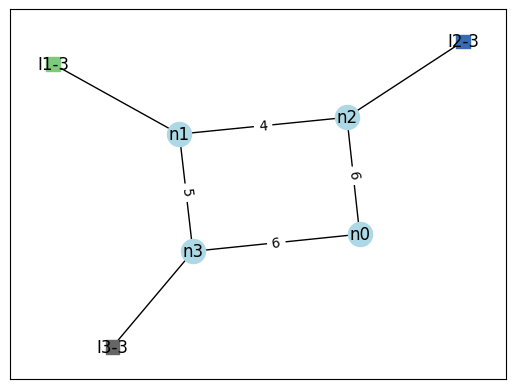

63.968328932383066 63.96832893238303
consumed budget 4.547473508864641e-12
expected consume 0.0


In [26]:
net_tmp.draw()
plt.show()
norm_tmp = net_tmp.norm()
net_norm = net.norm()
print(net_norm, norm_tmp)
real_consumed = net_norm ** 2 - norm_tmp ** 2
expect_consume = delta ** 2 - (r[1] * 4) ** 2
print("consumed budget", real_consumed)
print("expected consume", expect_consume)

In [27]:
net_tmp.merge("n3", "n0")
n3_tmp = net_tmp.network.nodes["n3"]["tensor"].value
n3 = net.network.nodes["n3"]["tensor"].value
n3_tmp_norm = np.linalg.norm(n3_tmp)
n3_norm = np.linalg.norm(n3)
print(n3_norm ** 2 - n3_tmp_norm ** 2)

1.4551915228366852e-11


In [49]:
n1 = net.network.nodes["n1"]["tensor"].value
n2 = net.network.nodes["n2"]["tensor"].value
print(net.network.nodes["n1"]["tensor"].indices)
print(net.network.nodes["n2"]["tensor"].indices)


[Index(name='I1', size=3), Index(name='r12', size=4), Index(name='s_0', size=5)]
[Index(name='I2', size=3), Index(name='r12', size=4), Index(name='s_1', size=6)]


In [50]:
res = np.einsum("ijk,ljm,iab,lac->kmbc", n1, n2, n1, n2)

In [53]:
print(np.linalg.norm(res))
print(np.sqrt(7))

2.635142429265676
2.6457513110645907


In [ ]:
print(np.linalg.norm(net_val - net.contract().value) / np.linalg.norm(net_val))

1.1907889803755407
